In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


In [8]:
 data_analyst_jobs= pd.read_csv('DataAnalyst.csv')

In [10]:
data_analyst_jobs = data_analyst_jobs.drop('Unnamed: 0',axis=1)
data_analyst_jobs = data_analyst_jobs.drop('Founded', axis=1)
data_analyst_jobs = data_analyst_jobs.drop('Competitors',axis=1)
print(f'Numberofrows:{data_analyst_jobs.shape[0]};Number of columns:{data_analyst_jobs.shape[1]};Noofmissingvalues:{sum(data_analyst_jobs.isna().sum())}')

Numberofrows:2253;Number of columns:13;Noofmissingvalues:1


In [11]:
data_analyst_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True


In [12]:
data_analyst_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Type of ownership  2253 non-null   object 
 9   Industry           2253 non-null   object 
 10  Sector             2253 non-null   object 
 11  Revenue            2253 non-null   object 
 12  Easy Apply         2253 non-null   object 
dtypes: float64(1), object(12)
memory usage: 228.9+ KB


In [13]:
 #renaming columns for better analysis
data_analyst_jobs.rename(columns={"Job Title": "job_title"},inplace=True)
data_analyst_jobs.rename(columns={"Salary Estimate":"salary_estimate"}, inplace=True)
data_analyst_jobs.rename(columns={"Job Description":"job_description"}, inplace=True)
data_analyst_jobs.rename(columns={"Company Name":"company_name"}, inplace=True)
data_analyst_jobs.rename(columns={"Location": "location"},inplace=True)
data_analyst_jobs.rename(columns={"Headquarters":"headquarters"}, inplace=True)
data_analyst_jobs.rename(columns={"Size": "size"},inplace=True)
data_analyst_jobs.rename(columns={"Type of ownership":"type_of_ownership"}, inplace=True)
data_analyst_jobs.rename(columns={"Industry": "industry"},inplace=True)
data_analyst_jobs.rename(columns={"Sector":"sector"},inplace=True)
data_analyst_jobs.rename(columns={"Revenue":"revenue"},inplace=True)
data_analyst_jobs.rename(columns={"EasyApply":"easy_apply"},inplace=True)

In [14]:
 data_analyst_jobs.head()

,job_title,salary_estimate,job_description,Rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True


In [15]:
# replacing Job Titles to avoid duplicates
data_analyst_jobs['job_title'] =data_analyst_jobs['job_title'].replace(['Sr. Data Analyst','sr. data analyst', 'Sr Data Analyst', 'sr dataanalyst','senior data analyst', 'Senior Data Analyst', 'DataAnalyst III', 'data analyst iii', 'senior data analyst'],'Senior DataAnalyst', regex=True)
data_analyst_jobs['job_title'] =data_analyst_jobs['job_title'].replace(['Data Analyst I', 'data analyst i', 'Data Analyst Junior', 'data analyst junior','Junior DataAnalyst', 'Junior Data AnalystI', 'Junior Data Analystl'],'Junior Data Analyst', regex=True)
data_analyst_jobs['job_title'] =data_analyst_jobs['job_title'].replace(['Data Analyst II','data analyst ii', 'Middle Data Analyst'],'Middle Data Analyst', regex=True)

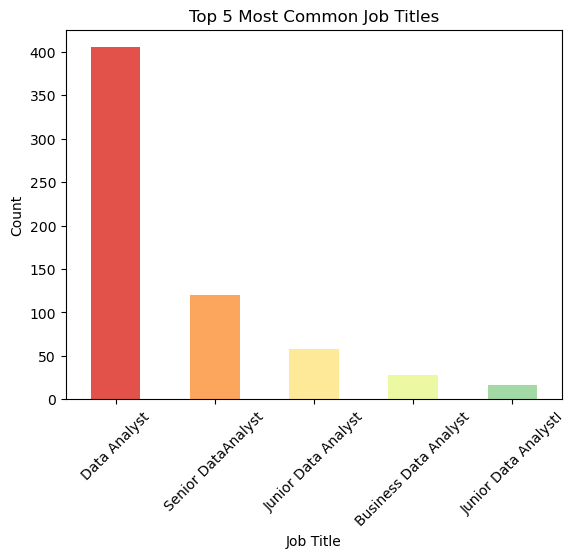

In [27]:
# Ensure the dataset exists
if "data_analyst_jobs" in locals() or "data_analyst_jobs" in globals():
    # Get the top 5 most common job titles
    to_plot = data_analyst_jobs["job_title"].value_counts()[:5]

    # Plot the bar chart
    ax = to_plot.plot(kind='bar', color=sns.color_palette('Spectral'))

    # Label the plot
    plt.xlabel("Job Title")
    plt.ylabel("Count")
    plt.title("Top 5 Most Common Job Titles")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

    # Display the data
    to_plot
else:
    print("Error: 'data_analyst_jobs' DataFrame is not defined.")


In [28]:
 ## Changing Salary column to int for better calculation
data_analyst_jobs[['MinSalary', 'MaxSalary']] = data_analyst_jobs['salary_estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')
data_analyst_jobs['MinSalary'] = pd.to_numeric(data_analyst_jobs['MinSalary'])
data_analyst_jobs['MaxSalary'] = pd.to_numeric(data_analyst_jobs['MaxSalary'])

In [29]:
 # changing format to float
data_analyst_jobs['MinSalary'] = data_analyst_jobs['MinSalary'].astype(float)
data_analyst_jobs['MaxSalary'] = data_analyst_jobs['MaxSalary'].astype(float)
data_analyst_jobs['average_salary'] = (data_analyst_jobs['MaxSalary'] + data_analyst_jobs['MinSalary']) / 2
 #drop salary estimate(unuseful column)
data_analyst_jobs.drop(['salary_estimate', 'MinSalary','MaxSalary'], axis=1, inplace=True)


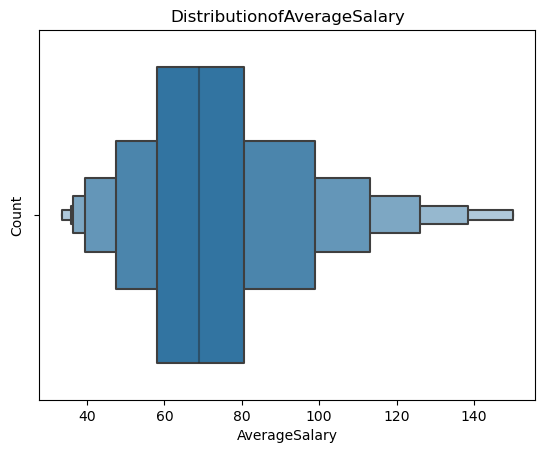

In [30]:
 # Average Salary
sns.boxenplot(data=data_analyst_jobs,x='average_salary')
plt.xlabel('AverageSalary')
plt.ylabel('Count')
plt.title('DistributionofAverageSalary')
plt.show()


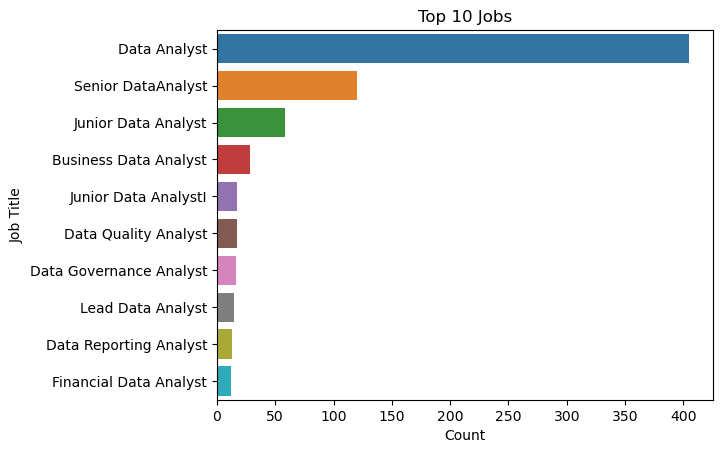

In [31]:
top_jobs = data_analyst_jobs['job_title'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Jobs')
plt.show()


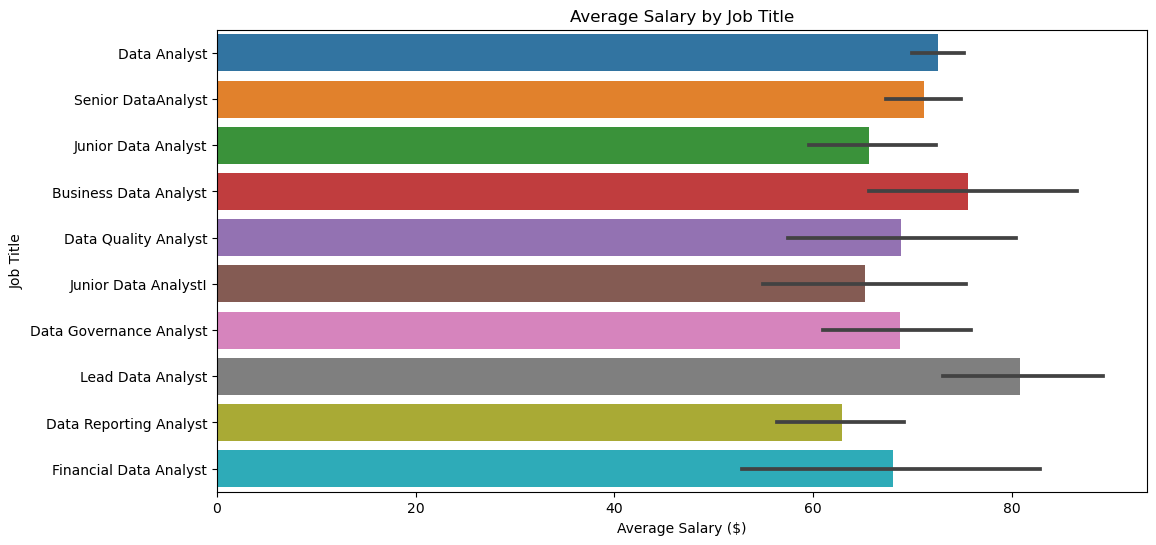

In [32]:
# Salary and Job Title
data_analyst_jobs_sorted = data_analyst_jobs.sort_values(by='average_salary',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='average_salary', y='job_title',
data=data_analyst_jobs_sorted, orient='h',
order=data_analyst_jobs_sorted['job_title'].value_counts().head(10).index)
plt.xlabel('Average Salary ($)')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
plt.show()

In [34]:
#salary trends by location
job_location = data_analyst_jobs.groupby('location')["average_salary"].mean().reset_index()
top_10 = job_location.sort_values(by = "average_salary",ascending=False).head(10)


In [42]:
# Ensure the dataset exists
if "top_10" in locals() or "top_10" in globals():
    fig = px.bar(
        top_10, 
        x='average_salary', 
        y='location',
        orientation='h', 
        title='Salary Trends by Location', 
        color="location",  
    )
    fig.update_layout(
        xaxis_title='AVG Salary (USD)',
        yaxis_title='Location',
        showlegend=False, 
        template="plotly_white" 
    )
# Show the figure
    fig.show()
else:
    print("Error: 'top_10' DataFrame is not defined.")


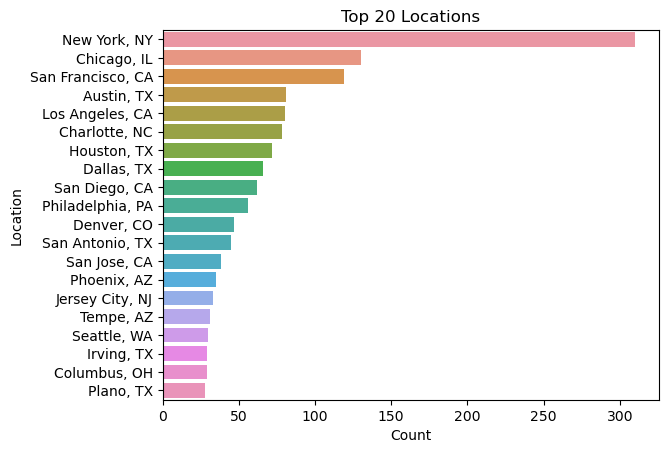

In [40]:
# Top work locations among interviewed
top_locations = data_analyst_jobs['location'].value_counts().head(20)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 20 Locations')
plt.show()


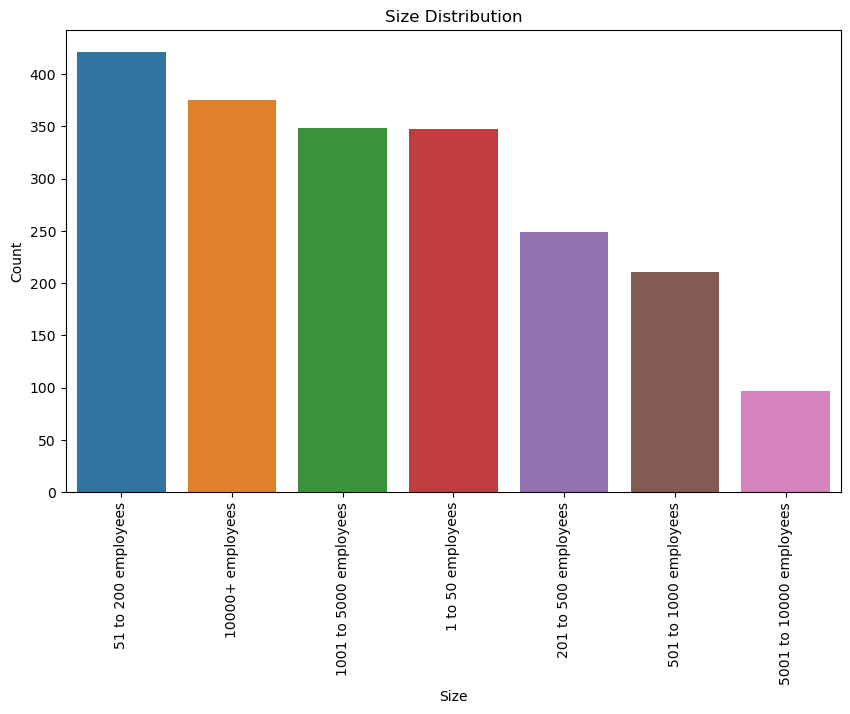

In [43]:
 # Companies by Amount of Employees
filtered_size = data_analyst_jobs[(data_analyst_jobs['size'] !='-1') & (data_analyst_jobs['size'] != 'Unknown')]
data_analyst_jobs_size = filtered_size['size'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=data_analyst_jobs_size.index,
y=data_analyst_jobs_size.values)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Size Distribution')
plt.xticks(rotation=90)
plt.show()

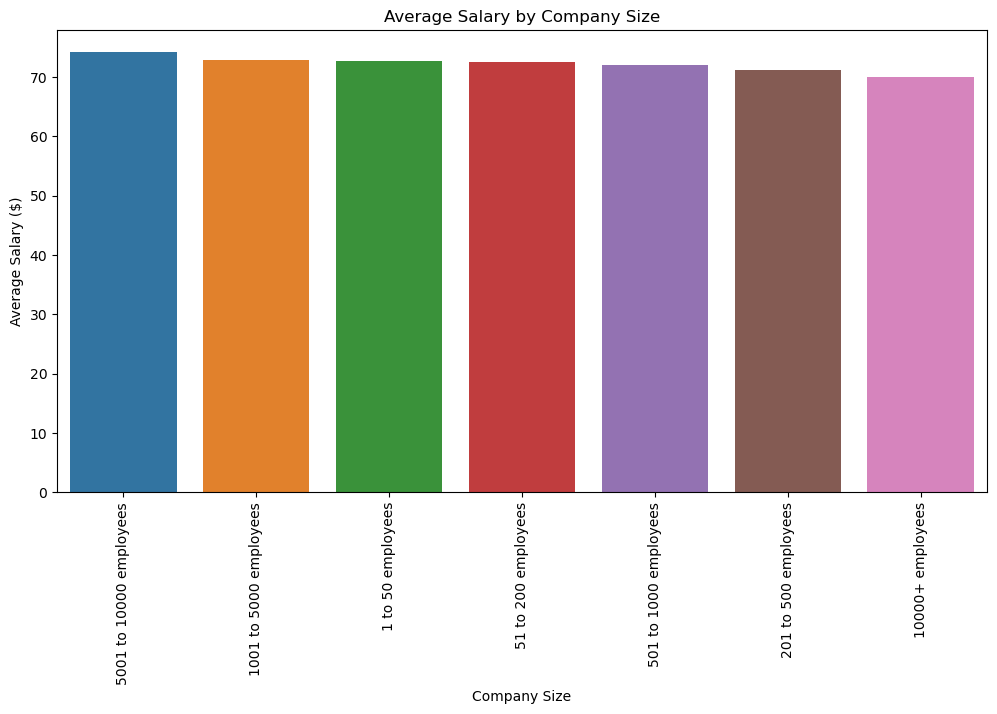

In [44]:
# Salary by Company Size
data_analyst_jobs_filtered = data_analyst_jobs[(data_analyst_jobs['size'] != '-1') & (data_analyst_jobs['size'] != 'Unknown')]
data_analyst_jobs_sizeXsalary = data_analyst_jobs_filtered.groupby('size')['average_salary'].mean().reset_index()
# Sort the DataFrame by 'AverageSalary' in descending order
data_analyst_jobs_sizeXsalary = data_analyst_jobs_sizeXsalary.sort_values(by='average_salary',ascending=False)
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='size', y='average_salary',
data=data_analyst_jobs_sizeXsalary)
plt.xlabel('Company Size')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=90)
plt.show()


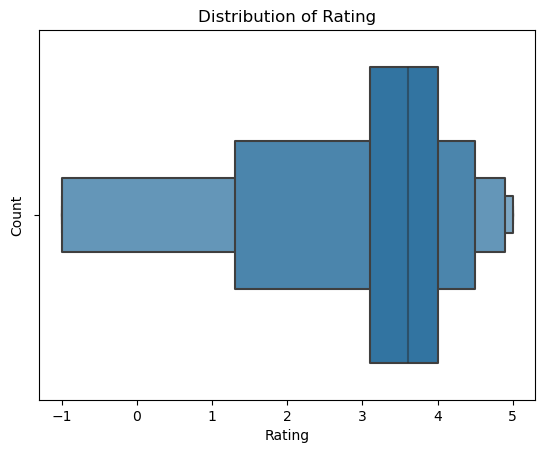

In [45]:
sns.boxenplot(data=data_analyst_jobs, x='Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating')
plt.show()

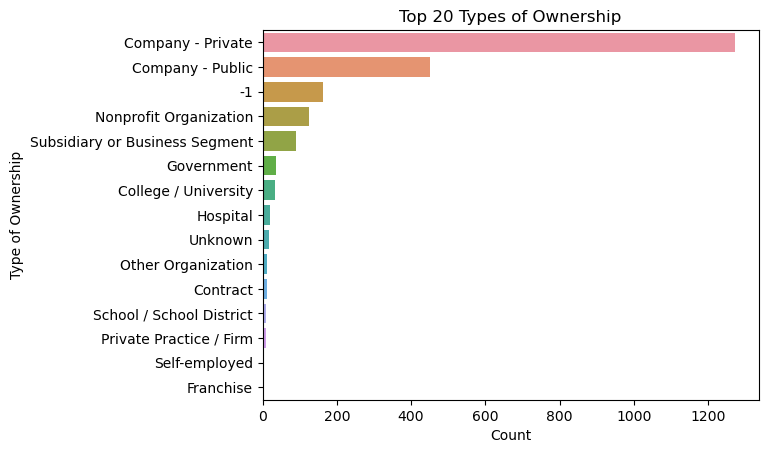

In [46]:
TOP = data_analyst_jobs[(data_analyst_jobs['type_of_ownership']!= '-1') & (data_analyst_jobs['type_of_ownership'] !='Unknown')]
TOP = data_analyst_jobs['type_of_ownership'].value_counts().head(20)
sns.barplot(x=TOP.values, y=TOP.index)
plt.xlabel('Count')
plt.ylabel('Type of Ownership')
plt.title('Top 20 Types of Ownership')
plt.show()


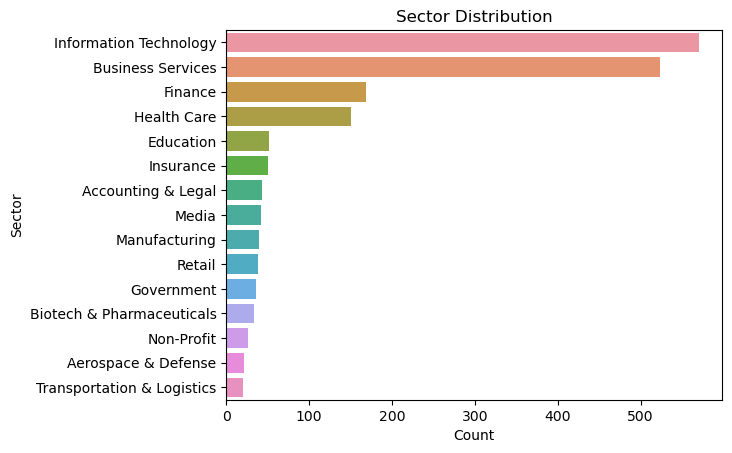

In [47]:
data_analyst_jobs_sector = data_analyst_jobs[data_analyst_jobs['sector'] !='-1']['sector'].value_counts().head(15)
sns.barplot(x=data_analyst_jobs_sector.values,
y=data_analyst_jobs_sector.index)
plt.xlabel('Count')
plt.ylabel('Sector')
plt.title('Sector Distribution')
plt.show()

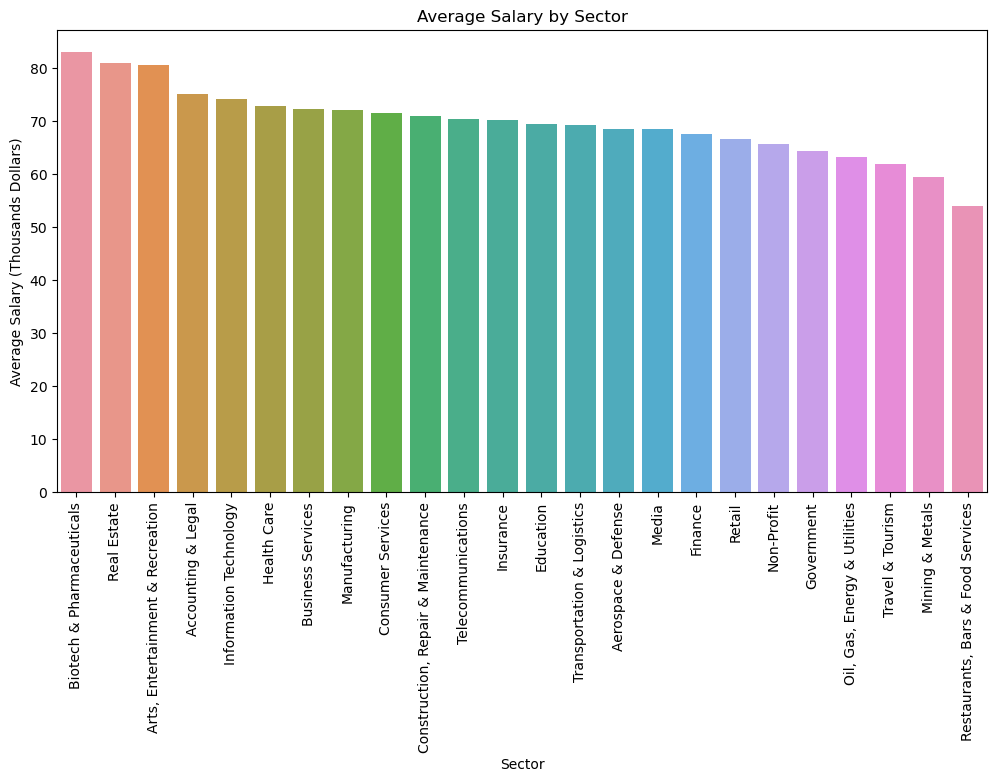

In [48]:
# Salary by Sector
average_salary_by_sector = data_analyst_jobs[data_analyst_jobs['sector'] != '-1'].groupby('sector')['average_salary'].mean().reset_index()
average_salary_by_sector = average_salary_by_sector.sort_values(by='average_salary',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='sector', y='average_salary',
data=average_salary_by_sector)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Average Salary (Thousands Dollars)')
plt.title('Average Salary by Sector')
plt.show()